In [1]:
import AmyloidArt
import matplotlib.pyplot as plt
import numpy as np

from scipy.ndimage.filters import gaussian_filter
from scipy.ndimage.filters import convolve

In [2]:
plt.rcParams['figure.figsize'] = [15, 10]

In [3]:
def get_Image(CANVAS_SIZE,P_BRANCH,SIG_MOMENTUM,N_NUCLEI,N_STEPS):
    Canvas = AmyloidArt.AmyloidCanvas(Side=CANVAS_SIZE,pBranch=P_BRANCH,SigMomentum=SIG_MOMENTUM)
    Canvas.make_grid(N_NUCLEI,N_STEPS)
    return Canvas.grid

In [4]:
# Size of the canvas
CANVAS_SIZE=1000

# Probability of branching at each growth step
P_BRANCH = 2. * 10**-3

# Defines the fibril curvature
SIG_MOMENTUM = 5.0 * 10**-4

# Number of fibre nuclei to start with
N_NUCLEI = 20

# Number of growth steps to populate canvas
N_STEPS = 10000

Img = get_Image(CANVAS_SIZE,P_BRANCH,SIG_MOMENTUM,N_NUCLEI,N_STEPS)

/Users/maximo/work/github/AmyloidArt/AmyloidArt.py:47: RuntimeWarning: invalid value encountered in greater
  gridPos[gridPos > self.Side-1] = np.nan


Making image: 99%

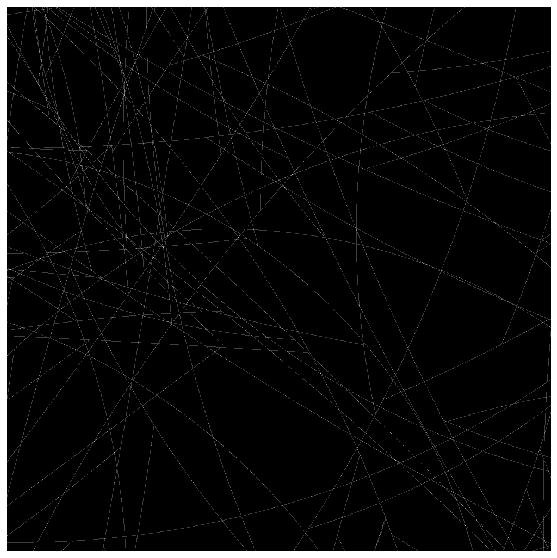

In [5]:
# Raw canvas
plt.imshow(Img,cmap='gray')
plt.axis('off')
plt.show()

### Add some blur and colormaps for a more artistic feel

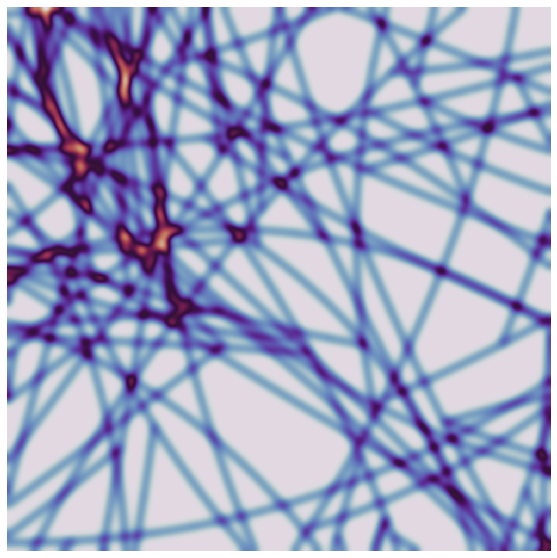

In [6]:
Img2 = gaussian_filter(Img,8)*5

plt.imshow(Img2, cmap='twilight')
plt.axis('off')
plt.show()
plt.imsave("Images/Hot_Hub.png",Img2,cmap='twilight')

### Making a more branched canvas

In [7]:
# Size of the canvas
CANVAS_SIZE=1000

# Probability of branching at each growth step
P_BRANCH = 2.5 * 10**-3

# Defines the fibril curvature
SIG_MOMENTUM = 4.0 * 10**-4

# Number of fibre nuclei to start with
N_NUCLEI = 50

# Number of growth steps to populate canvas
N_STEPS = 10000

Img = get_Image(CANVAS_SIZE,P_BRANCH,SIG_MOMENTUM,N_NUCLEI,N_STEPS)

Making image: 99%

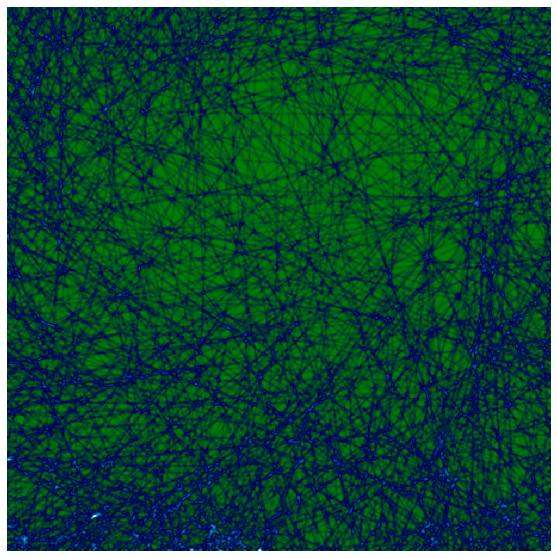

In [8]:
Img2 = gaussian_filter(Img,2)*5

# Apply a sharpening filter

filt = np.array([[-0.,-1.,-0.],
                 [-1.,5.,-1.],
                 [-0.,-1.,-0.]])


Img3 = convolve(Img2,filt)

plt.imshow(Img3, cmap='ocean')
plt.axis('off')
plt.show()
plt.imsave("Images/Web.png",Img3,cmap='ocean')